# Reproducibilityof the statistical analisis of the mortaliy rate after hurricane maria
## Requirements:

__Tools:__ Analysis will be done in python, using a number of useful open source python packages:
- __Requests__ Requests is the only Non-GMO HTTP library for Python, safe for human consumption.
- __PyPDF2__ A Pure-Python library built as a PDF toolkit.

__Anaconda__ https://www.anaconda.com/download/
__Jupyter__ https://jupyter.org/

Most of these packages come bundled as part of the Anaconda python distribution. Install Anaconda for the simplest way to get all dependancies for the tutorial: __Anaconda__ https://www.anaconda.com/download/

# Part 1: Data Wrangling
## Necessary packages

In [1]:
#These are the necesary libraries to work with the PDF
#!pip install requests #this might come with a standard anaconda install
#!pip install PyPDF2 #we will use this to scrape text out of the pdf

### Aquire the PDF

In [2]:
import requests

pdf = r"https://github.com/c2-d2/pr_mort_official/raw/master/data/RD-Mortality-Report_2015-18-180531.pdf"

open("Mortality.pdf" , 'wb').write(requests.get(pdf).content)

from IPython.display import IFrame#insert the pdf into the notebook
IFrame(src="Mortality.pdf" ,width=700 ,height=350)

In [3]:
import PyPDF2
pdfFileObj = open('Mortality.pdf', 'rb')
pdfReader = PyPDF2.PdfFileReader(pdfFileObj)
pageObj = pdfReader.getPage(0)
#pageObj.extractText() #uncomment to see alphabet soup

'6/4/2018\nDepartamento de Salud - Registro Demográfico - División de Calidad y Estadísticas Vitales\nJAN\n2015\n2016\n2017\n2018\n1\n107\n89\n107\n95\n2\n101\n88\n108\n107\n3\n78\n79\n115\n92\n4\n121\n90\n81\n108\n5\n99\n80\n79\n94\n6\n104\n96\n90\n87\n7\n79\n92\n116\n97\n8\n73\n77\n108\n85\n9\n90\n86\n81\n91\n10\n75\n90\n85\n89\n11\n88\n86\n77\n94\n12\n85\n81\n75\n92\n13\n74\n79\n84\n107\n14\n98\n87\n103\n90\n15\n88\n94\n104\n93\n16\n111\n99\n103\n103\n17\n92\n92\n85\n83\n18\n90\n83\n94\n96\n19\n101\n81\n91\n75\n20\n98\n100\n88\n99\n21\n105\n81\n102\n91\n22\n71\n87\n90\n95\n23\n82\n92\n95\n67\n24\n84\n100\n87\n93\n25\n83\n92\n96\n86\n26\n83\n98\n94\n93\n27\n73\n91\n81\n86\n28\n87\n98\n99\n91\n29\n73\n92\n97\n88\n30\n78\n90\n97\n82\n31\n73\n72\n82\n72\nTotal\n2744\n2742\n2894\n2821\nAvg\n89\n88\n93\n91\nMax\n121\n100\n116\n108\nNOTA:\nMin\n71\n77\n75\n67\n* Año 2017 - Datos preliminares; archivo final en proceso operacional de revisión de calidad y validación.\nMed\n88\n90\n94\n92\n**

In [4]:
#this is to adjust the months to have an order to them
MonthToNumber = {
    "SEP":"09",
    "OCT":"10",
    "NOV":"11",
    "DEC":"12",
    "JAN":"01",
    "FEB":"02",
    "MAR":"03",
    "APR":"04",
    "MAY":"05",
    "JUN":"06",
    "JUL":"07",
    "AGO":"08"}

In [5]:
def scrape_data(data , month):
    data = data[1].split()
    labels = data[0:4]
    indexes = []
    stop = data.index('Total')
    out = []
    for i in range(4 , stop , 5):
        indexes.append(data[i])
        day = data[i]
        if not len(day)-1:
            day = "0"+day
        if (i != 144 or month!="FEB"):#Nuts to whoever decided that the months arent all the same
            
            out.append([F"{labels[0]}-{MonthToNumber[month]}-{day}",int(data[i+1])])
            out.append([F"{labels[1]}-{MonthToNumber[month]}-{day}",int(data[i+2])])
            out.append([F"{labels[2]}-{MonthToNumber[month]}-{day}",int(data[i+3])])            
            out.append([F"{labels[3]}-{MonthToNumber[month]}-{day}",int(data[i+4])])
        else:
            #print("Breaking")
            out.append([F"{labels[1]}-{MonthToNumber[month]}-{day}",int(data[i+1])])
            break
    
    return out

In [6]:
def scrape(txt):
    data = []
    months = ["SEP", "OCT", "NOV", "DEC" , "JAN", "FEB", "MAR", "APR", "MAY" , "JUN" , "JUL", "AGO"]
    for month in months:
        if month in txt:
            """if "FEB"==month:
                return feb_scrape(txt.split(month))
            else:
                return general_scrape(txt.split(month))"""
            return scrape_data(txt.split(month) , month)

In [7]:
data = []
for pages in range(pdfReader.getNumPages()):
    data += scrape(pdfReader.getPage(pages).extractText())
data.sort()
for frame in data[:10]:
    print(frame)
for frame in data[-10:]:
    print(frame)

['2015-01-01', 107]
['2015-01-02', 101]
['2015-01-03', 78]
['2015-01-04', 121]
['2015-01-05', 99]
['2015-01-06', 104]
['2015-01-07', 79]
['2015-01-08', 73]
['2015-01-09', 90]
['2015-01-10', 75]
['2018-12-22', 0]
['2018-12-23', 0]
['2018-12-24', 0]
['2018-12-25', 0]
['2018-12-26', 0]
['2018-12-27', 0]
['2018-12-28', 0]
['2018-12-29', 0]
['2018-12-30', 0]
['2018-12-31', 0]


In [8]:
import pickle
pickle.dump(data, open( "df.pkl", "wb" ) )
!ls

 Analysis.ipynb		   Mortality.pdf     Wrangling.py   main.ipynb
'Initial plotting.ipynb'   Wrangling.ipynb   df.pkl	    mortality.csv


# Step 2: Raw Data Visualization
## Requirements to import raw data
__Tools:__ Analysis will be done in python, using a number of useful open source python packages:
- __Pandas__ A very useful data analysis and manipulation package http://pandas.pydata.org/
- __Numpy__ Python's scientific computing package. http://www.numpy.org/
- __ggplot__ Python implementation of the grammar of graphics created for R https://pypi.org/project/ggplot/
- __Matplotlib__ Package for creating charts and other visualizations https://matplotlib.org/
- __datetime__ Module that supplies classes for manipulating dates and times https://docs.python.org/3/library/datetime.html

All these packages come bundled as part of the Anaconda python distribution. Install Anaconda for the simplest way to get all dependancies for the tutorial:


Let's get started by importing the raw data and libraries we will use.


In [9]:
#Import pickle library to import pickled file
import pickle
data = pickle.load( open( "df.pkl", "rb" ) )

###################IMPORTANT####################
#site-packages/pandas/lib.py needs to be edited#
#change:from pandas_lib._lib import *          #
#    to:from pandas import *                   #
################################################

#Import libraries to handle data and plotting
import pandas as pd
import numpy as np
from ggplot import *
import matplotlib as plt
import datetime

You can access Timestamp as pandas.Timestamp [utils.py:81]


## Convert data to dataframe
Now, we convert raw data file into a manageable pandas dataframe and filter the data we will actually plot.

In [10]:
#Create arrays to allocate dates and deaths from raw data file
dates, deaths = [], []

#Append dates and deaths to corresponding array
for a, b in data:
    dates.append(a)
    deaths.append(b)

#Convert dates to datetime object for easy handling
dates = [pd.to_datetime(d) for d in dates]

#Merge both arrays into dataframe
df = pd.DataFrame(list(zip(dates, deaths)), index = dates, columns = ('Dates', 'Deaths'))

#Filter dates and deaths to plot
dates = df.loc['2015-01-01':'2018-05-30']
deaths = df['Deaths'] > 0

#Create new dataframe from filters
df_2 = df[deaths]
df_2 = df.loc['2017-01-01':'2018-05-30']

# Scatter plot of raw data for 2017-2018 deaths in Puerto Rico
Lastly, we use ggplot to create a scatter plot with the data of interest.

Mean death count per day:  83.53980582524272
Hurricane María Date:  2017-09-20 00:00:00
Hurricane María Deaths: 106


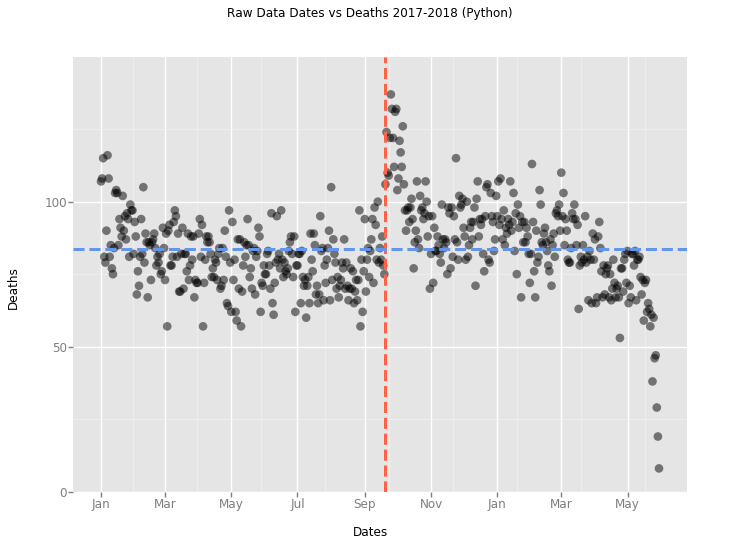

<ggplot: (-9223363251440103052)>


In [11]:
#Create scatter plot of Dates vs Deaths from January, 1, 2017-May, 30, 2018 
#data for observations with more than zero(0) deaths
g = (ggplot(aes(x = 'Dates', y = 'Deaths'), data = df_2) +\
geom_point(alpha = 0.5, color = "black", size = 75) +\
ggtitle("Raw Data Dates vs Deaths 2017-2018 (Python)") +\
scale_x_date(labels = "%b", date_breaks = "1 months", date_minor_breaks = "1 months") +\
scale_y_continuous(limits = (0, 150),
        labels = labs(50, 150, 50),
        breaks = range(0, 150, 50)) +\
#Intercept line at date of María Hurricane and mean deaths per day, respectively
geom_vline(x = [pd.to_datetime(datetime.date(2017,9,20))], linetype = "dashed", color = "tomato", size = 3) +\
geom_hline(y = df_2['Deaths'].mean(), linetype = "dashed", color = "cornflowerblue", size = 3))

print("Mean death count per day: ", df_2['Deaths'].mean())
print("Hurricane María Date: ", df_2.loc['2017-09-20', 'Dates'])
print("Hurricane María Deaths:", df_2.loc['2017-09-20', 'Deaths'])
print(g)

# Step 3: Data Analysis

__Tools__: Analysis will be done in python, using a number of useful open source python packages:

- __Pandas__ A very useful data analysis and manipulation package http://pandas.pydata.org/
- __Numpy__ Python's scientific computing package. http://www.numpy.org/
- __Statsmodels__ is a module that provides classes and functions for the estimation of many different statistical models. https://www.statsmodels.org/



Let's get started by importing the raw data and libraries we will use.

In [12]:
import pandas as pd
import numpy as np

# Import Dataframe and add the date columns
Now, the data is more manageable and we can work with it.

In [13]:
# DataFrame is imported as a csv from the wrangling and made into a dataframe with the date as index
df = pd.read_csv('mortality.csv', parse_dates = ['date'])
df = df.set_index(df.date)

# Adding year, month, day as columns in the dataframe
df['year'] = pd.DatetimeIndex(df['date']).year
df['month'] = pd.DatetimeIndex(df['date']).month
df['day'] = pd.DatetimeIndex(df['date']).day

df.head()

,date,deaths,year,month,day
date,,,,,
2015-01-01,2015-01-01,107,2015,1,1
2015-01-02,2015-01-02,101,2015,1,2
2015-01-03,2015-01-03,78,2015,1,3
2015-01-04,2015-01-04,121,2015,1,4
2015-01-05,2015-01-05,99,2015,1,5


# Making dictionaries from estimates and adding it to our data set
The website https://simplystatistics.org/2018/06/08/a-first-look-at-recently-released-official-puerto-rico-death-count-data/ includes estimates from Teralytics and estimates of population by year. 

In [14]:
# population from yearly data and data sampled from Teralytics estimates by author 
# this is made into a dictionary 
samples = {
    '2010-07-02': 3721525,
    '2011-07-02': 3678732,
    '2012-07-02': 3634488,
    '2013-07-02': 3593077,
    '2014-07-02': 3534874,
    '2015-07-02': 3473177,
    '2016-07-02': 3406520,
    '2017-07-02': 3337177,
    
    '2017-09-19': 3337000,
    '2017-10-15': 3237000,
    '2017-11-15': 3202000,
    '2017-12-15': 3200000,
    '2018-01-15': 3223000,
    '2018-02-15': 3278000
}

# add the above data points to our data set
# turn the dictionary into a datafrane and add it into the original data frame
# index is date and the column is est_pop
pdf = pd.DataFrame.from_dict(samples, orient='index', columns=['est_pop'])
pdf = pdf.set_index(pd.to_datetime(pdf.index))
pdf.est_pop = pdf.est_pop.astype(int)

df = df.join(pdf)

# Linear interpolation of estimated population
Linear interpolation is a method of curve fitting using linear polynomials to construct new data points within the range of a discrete set of known data points. This estimate is used to graph.

In [15]:
# linear interpolation is method of curve fitting using linear polynomials to construct 
# new data points within the range of a discrete set of known data points 
df['est_pop_lerped'] = df.est_pop.interpolate(limit_direction='both')


# Calculating Rate
Using days prior to sept 20th to calculate yearly median death rate.

In [16]:
# made a copy of the dataframe
rdf = df.copy()

# the article says only to use days prior to sept 20th in calcualting yearly median death rate
rdf = rdf[rdf['date'].dt.dayofyear < 263] # sept 20th is 263rd day of year 

# calculating calc_rate
rdf['calc_rate'] = rdf.deaths / rdf.est_pop_lerped * 365 * 1000
rdf.groupby('year').median() 

,deaths,month,day,est_pop,est_pop_lerped,calc_rate
year,,,,,,
2015,78.0,5.0,15.0,3473177.0,3.473177e+06,8.197106
2016,78.5,5.0,15.0,3406520.0,3.416081e+06,8.387468
2017,80.0,5.0,15.0,3337088.5,3.346961e+06,8.750266
2018,66.0,5.0,15.0,3250500.0,3.278000e+06,7.348993


# Calculating yearly rates
Now, we use the data given to us by the page previously mentioned and add it into our dataframe.

In [17]:
# Dictionary given by the original website
yearly_rates = {
    2015: 8.197106,
    2016: 8.387468,
    2017: 8.750266,
    2018: 8.750266 # this is assumed same as 2017 from above result
}

# yrdf= yearly rates data frame
# turn the dictionary into a data frame and add to dataframe
yrdf = pd.DataFrame.from_dict(yearly_rates, orient='index', columns=['year_rate'])
df = df.join(yrdf, on='year')

# Calculate day rate
Adding a daily rate column calculating the death rate across the entire dataset.

In [18]:
# recalculate death rate across entire dataset
df['day_rate'] = df.deaths / df.est_pop_lerped * 365 * 1000

# Clean up population columns
Cleaning up the columns to make it more manageable.

In [19]:
# clean up population columns
df = df.drop('est_pop', axis=1)
df = df.rename({"est_pop_lerped": "pop"}, axis=1)
df.head()

,date,deaths,year,month,day,pop,year_rate,day_rate
date,,,,,,,,
2015-01-01,2015-01-01,107,2015,1,1,3473177.0,8.197106,11.244748
2015-01-02,2015-01-02,101,2015,1,2,3473177.0,8.197106,10.614201
2015-01-03,2015-01-03,78,2015,1,3,3473177.0,8.197106,8.197106
2015-01-04,2015-01-04,121,2015,1,4,3473177.0,8.197106,12.716023
2015-01-05,2015-01-05,99,2015,1,5,3473177.0,8.197106,10.404019


# Calculate day rate and average rate

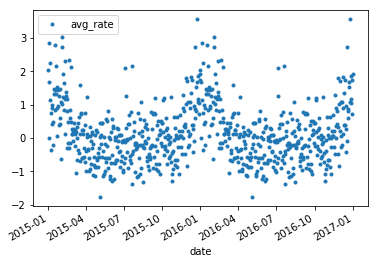

In [20]:
adf = df.query('year < 2017 and not (month == 2 and day == 29)')
ardf = adf.groupby(['month', 'day'], as_index=False).apply(lambda x: (x.day_rate - x.year_rate).mean())
ardf = ardf.to_frame(name='avg_rate')
ajdf = adf.merge(ardf, on=['month', 'day'])

adf = ajdf 
adf.plot(x='date', y='avg_rate', style='.')

# Average rate smoothed
Using lowess to calculate the average rate.

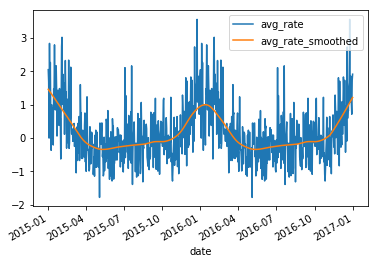

In [21]:
# Need to run and use lowess to smoothen out graph
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm
lowess = sm.nonparametric.lowess

smdf = adf
smdf['avg_rate_smoothed'] = lowess(adf.avg_rate, adf.date, frac=0.15, it=3, return_sorted=False)
smdf.plot(x='date', y=['avg_rate', 'avg_rate_smoothed'])

# Calculate trend
Merge some columns and add it to a new dataframe that includes all the data.

Defaulting to column, but this will raise an ambiguity error in a future version [interactiveshell.py:3267]


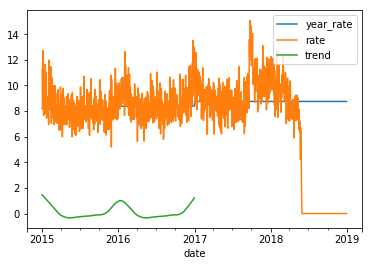

In [22]:
# Merging and renaming
full = pd.merge(df, smdf[['date', 'avg_rate', 'avg_rate_smoothed']], on='date', how='left')
full = full.set_index(pd.to_datetime(full.date))

full = full.rename({"avg_rate_smoothed": "trend", "day_rate": "rate"}, axis=1)

# TODO: remove this
full.plot(x='date', y=['year_rate', 'rate', 'trend'])

# Annual trend
Calculate annual trend using the data from 2015.

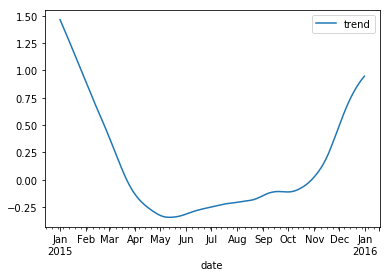

In [23]:
# copy annual trend to 2017-18
ann_trend = full.loc[full["date"].dt.year == 2015, "trend"]
ann_trend # how to copy to 2017-18??
ann_trend = pd.DataFrame(ann_trend)
ann_trend.plot()